# S12 T01: Aprenentatge Supervisat - Regressions

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Exercise 1


Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

## Loading, exploring and transformation of dataset

In [2]:
df=pd.read_csv('DelayedFlights2.csv')

In [3]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Reducing dimensions to ease calculations
df2=df.sample(100000)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 413796 to 50054
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   Year               100000 non-null  int64  
 2   Month              100000 non-null  int64  
 3   DayofMonth         100000 non-null  int64  
 4   DayOfWeek          100000 non-null  int64  
 5   DepTime            100000 non-null  float64
 6   CRSDepTime         100000 non-null  int64  
 7   ArrTime            99648 non-null   float64
 8   CRSArrTime         100000 non-null  int64  
 9   UniqueCarrier      100000 non-null  object 
 10  FlightNum          100000 non-null  int64  
 11  TailNum            99999 non-null   object 
 12  ActualElapsedTime  99582 non-null   float64
 13  CRSElapsedTime     99993 non-null   float64
 14  AirTime            99582 non-null   float64
 15  ArrDelay           99582 non-null   float64
 16

In [6]:
# Looking for duplicated

df.duplicated().sum()

0

In [7]:
# Dropping some unnecessary columns

var= ['Unnamed: 0', 'Year', 'FlightNum', 'TailNum','CancellationCode','Cancelled','Diverted']

In [8]:
df2=df2.drop(columns=var)

In [9]:
# Filling Nan with median

fill=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrTime','TaxiIn','TaxiOut','ArrDelay'] 

In [10]:
df2[fill]=df2[fill].fillna(df2[fill].median())

In [11]:
df2.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [12]:
# Numeric features

num_columns = list(df2.select_dtypes('number').columns)
print(f"Numerical columns are: {num_columns}")



Numerical columns are: ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [13]:
# Categorical features 

cat_columns = list(df2.select_dtypes(exclude=['number']).columns)
print (f"Categorical columns are: {cat_columns}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest']


In [14]:
df2.describe().round(2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,6.11,15.78,3.99,"1,518.66","1,466.72","1,610.49","1,633.92",133.46,134.47,108.40,42.04,43.05,767.40,6.81,18.27,13.00,2.32,10.08,0.05,19.51
std,3.49,8.78,1.99,448.16,423.34,546.25,463.70,72.34,71.68,68.90,56.39,52.95,577.25,5.32,14.45,35.66,16.41,28.07,1.37,34.67
min,1.00,1.00,1.00,1.00,1.00,1.00,0.00,16.00,1.00,5.00,-55.00,6.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,"1,205.00","1,135.00","1,319.00","1,325.00",80.00,81.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,"1,544.00","1,509.00","1,714.00","1,705.00",116.00,117.00,90.00,24.00,24.00,607.00,6.00,14.00,2.00,0.00,1.00,0.00,9.00
75%,9.00,23.00,6.00,"1,859.00","1,815.00","2,030.00","2,014.00",165.00,165.00,137.00,56.00,53.00,999.00,8.00,21.00,9.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,"2,400.00","2,359.00","2,400.00","2,400.00",687.00,660.00,652.00,"1,279.00","1,280.00","4,962.00",186.00,345.00,"1,139.00",876.00,768.00,155.00,"1,184.00"


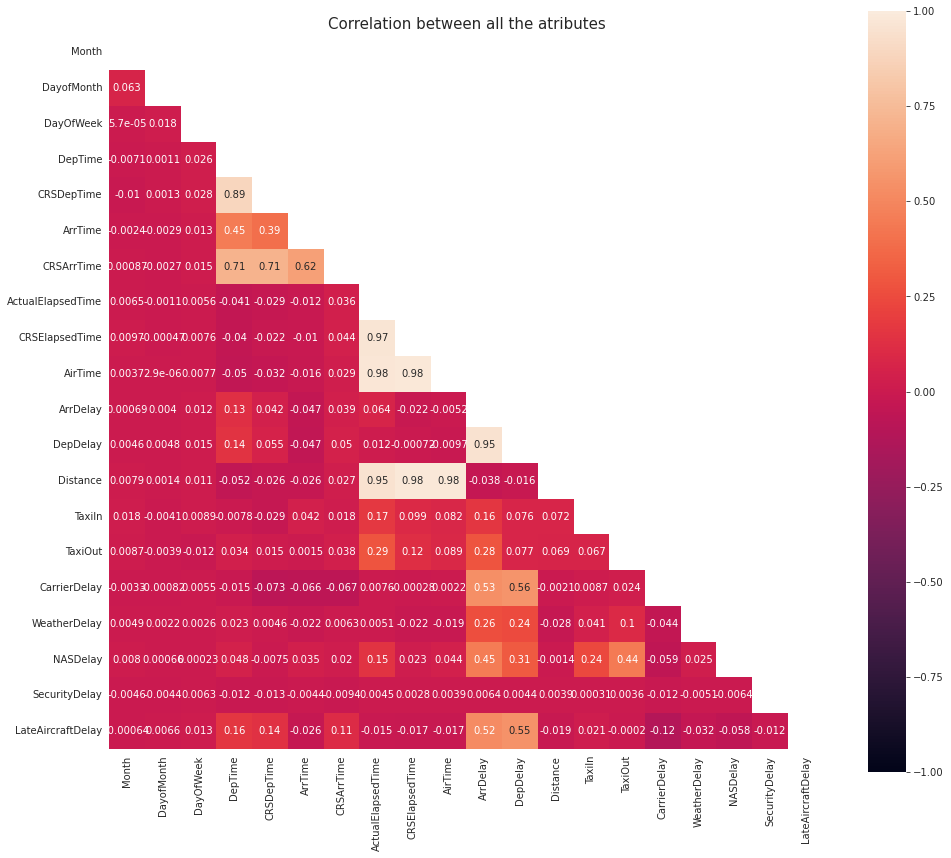

In [15]:
# Creating a correlation heatmap with the numercial variables

corr = df2.loc[:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, square=True)
    
plt.title('Correlation between all the atributes',fontsize=15)
plt.show()

ArrDelay, our target variable, is strongly correlated with DepDelay, followed by a positive correlation with CarrierDelay and LateAircraftDelay.

In [16]:
# Creating target variable for Machine Learning. 

y=df2.pop('ArrDelay')

In [17]:
y

413796      6.00
105705    -12.00
302553     22.00
956463     12.00
1922327   150.00
           ...  
879791     -2.00
197930     12.00
1376973    95.00
1360872    24.00
50054     110.00
Name: ArrDelay, Length: 100000, dtype: float64

In [18]:
# Crating variable with features for Machine Learning.

X=df2.select_dtypes('number')

In [19]:
X

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
413796,3,16,7,"1,653.00",1610,"1,845.00",1839,112.00,149.00,103.00,43.00,936,2.00,7.00,2.00,0.00,1.00,0.00,9.00
105705,1,27,7,"1,140.00",1130,"1,355.00",1407,135.00,157.00,104.00,10.00,780,4.00,27.00,2.00,0.00,1.00,0.00,9.00
302553,2,28,4,"1,847.00",1825,"2,035.00",2013,108.00,108.00,93.00,22.00,667,4.00,11.00,0.00,0.00,0.00,0.00,22.00
956463,6,30,1,"1,752.00",1725,"2,022.00",2010,150.00,165.00,132.00,27.00,978,8.00,10.00,2.00,0.00,1.00,0.00,9.00
1922327,12,30,2,"1,901.00",1640,"2,107.00",1837,126.00,117.00,85.00,141.00,529,11.00,30.00,0.00,0.00,150.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879791,5,8,4,44.00,30,742.00,744,238.00,254.00,215.00,14.00,1946,7.00,16.00,2.00,0.00,1.00,0.00,9.00
197930,2,13,3,"1,717.00",1700,"1,837.00",1825,80.00,85.00,70.00,17.00,446,2.00,8.00,2.00,0.00,1.00,0.00,9.00
1376973,8,16,6,"1,211.00",1030,"1,340.00",1205,89.00,95.00,72.00,101.00,416,7.00,10.00,95.00,0.00,0.00,0.00,0.00
1360872,8,2,6,"1,622.00",1552,"1,714.00",1917,116.00,145.00,90.00,30.00,874,6.00,8.00,2.00,0.00,1.00,0.00,9.00


In [20]:
X_=X.copy()

In [21]:
X_2=X.copy()

In [22]:
X_

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
413796,3,16,7,"1,653.00",1610,"1,845.00",1839,112.00,149.00,103.00,43.00,936,2.00,7.00,2.00,0.00,1.00,0.00,9.00
105705,1,27,7,"1,140.00",1130,"1,355.00",1407,135.00,157.00,104.00,10.00,780,4.00,27.00,2.00,0.00,1.00,0.00,9.00
302553,2,28,4,"1,847.00",1825,"2,035.00",2013,108.00,108.00,93.00,22.00,667,4.00,11.00,0.00,0.00,0.00,0.00,22.00
956463,6,30,1,"1,752.00",1725,"2,022.00",2010,150.00,165.00,132.00,27.00,978,8.00,10.00,2.00,0.00,1.00,0.00,9.00
1922327,12,30,2,"1,901.00",1640,"2,107.00",1837,126.00,117.00,85.00,141.00,529,11.00,30.00,0.00,0.00,150.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879791,5,8,4,44.00,30,742.00,744,238.00,254.00,215.00,14.00,1946,7.00,16.00,2.00,0.00,1.00,0.00,9.00
197930,2,13,3,"1,717.00",1700,"1,837.00",1825,80.00,85.00,70.00,17.00,446,2.00,8.00,2.00,0.00,1.00,0.00,9.00
1376973,8,16,6,"1,211.00",1030,"1,340.00",1205,89.00,95.00,72.00,101.00,416,7.00,10.00,95.00,0.00,0.00,0.00,0.00
1360872,8,2,6,"1,622.00",1552,"1,714.00",1917,116.00,145.00,90.00,30.00,874,6.00,8.00,2.00,0.00,1.00,0.00,9.00


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
# Select features with variance_inflation_factor

def multicollinearity_check(X_, thresh=5.0):
    data_type = X_.dtypes
    # print(type(data_type))
    int_cols = \
    X_.select_dtypes(include=['int', 'int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']).shape[1]
    total_cols = X_.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception('All the columns should be integer or float, for multicollinearity test.')
        else:
            variables = list(range(X_.shape[1]))
            dropped = True
            print('''\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.\n\n''')
            while dropped:
                dropped = False
                vif = [variance_inflation_factor(X_.iloc[:, variables].values, ix) for ix in variables]
                print('\n\nvif is: ', vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print('dropping \'' + X_.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                    # del variables[maxloc]
                    X_.drop(X_.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X_.shape[1]))
                    dropped = True

            print('\n\nRemaining variables:\n')
            print(X_.columns[variables])
            # return X.iloc[:,variables]
            return X_
    except Exception as e:
        print('Error caught: ', e)

In [25]:
multicollinearity_check(X_)



The VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.




vif is:  [3.8130394807976455, 3.9228828449522175, 4.525344432730887, 66.99942119322195, 67.06686763391934, 15.969406087923868, 38.42978620600707, 15310.640178340554, 346.8374988890447, 11041.781155732233, 65.54875066926533, 84.83345772721123, 51.59587522596632, 352.18618571982086, 22.37478443969944, 4.964372241523477, 13.536472621311505, 1.032262752188387, 24.71461443821833]
dropping 'ActualElapsedTime' at index: 7


vif is:  [3.813014674767599, 3.9228157361394533, 4.525179304651955, 66.99901451889156, 67.05960426991462, 15.968864183368085, 38.429758422519896, 345.3144697831669, 220.87568797680922, 64.41152150872975, 84.73361584532778, 3.571221916942175, 9.171982023277168, 21.992642849076766, 4.891090198091617, 13.292824012707833, 1.0316800819247787, 24.29965317

,Month,DayofMonth,DayOfWeek,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
413796,3,16,7,936,2.00,7.00,2.00,0.00,1.00,0.00,9.00
105705,1,27,7,780,4.00,27.00,2.00,0.00,1.00,0.00,9.00
302553,2,28,4,667,4.00,11.00,0.00,0.00,0.00,0.00,22.00
956463,6,30,1,978,8.00,10.00,2.00,0.00,1.00,0.00,9.00
1922327,12,30,2,529,11.00,30.00,0.00,0.00,150.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
879791,5,8,4,1946,7.00,16.00,2.00,0.00,1.00,0.00,9.00
197930,2,13,3,446,2.00,8.00,2.00,0.00,1.00,0.00,9.00
1376973,8,16,6,416,7.00,10.00,95.00,0.00,0.00,0.00,0.00
1360872,8,2,6,874,6.00,8.00,2.00,0.00,1.00,0.00,9.00


In [26]:
# Select features with SelectKBest according to the k highest scores.

from sklearn.feature_selection import SelectKBest,f_regression
X_2.shape

(100000, 19)

In [27]:
selector = SelectKBest(f_regression, k=11)
selector.fit(X_2, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_2.iloc[:,cols]

In [28]:
# New dataset transformed.
features_df_new

,DepTime,CRSDepTime,ArrTime,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
413796,"1,653.00",1610,"1,845.00",112.00,43.00,2.00,7.00,2.00,0.00,1.00,9.00
105705,"1,140.00",1130,"1,355.00",135.00,10.00,4.00,27.00,2.00,0.00,1.00,9.00
302553,"1,847.00",1825,"2,035.00",108.00,22.00,4.00,11.00,0.00,0.00,0.00,22.00
956463,"1,752.00",1725,"2,022.00",150.00,27.00,8.00,10.00,2.00,0.00,1.00,9.00
1922327,"1,901.00",1640,"2,107.00",126.00,141.00,11.00,30.00,0.00,0.00,150.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
879791,44.00,30,742.00,238.00,14.00,7.00,16.00,2.00,0.00,1.00,9.00
197930,"1,717.00",1700,"1,837.00",80.00,17.00,2.00,8.00,2.00,0.00,1.00,9.00
1376973,"1,211.00",1030,"1,340.00",89.00,101.00,7.00,10.00,95.00,0.00,0.00,0.00
1360872,"1,622.00",1552,"1,714.00",116.00,30.00,6.00,8.00,2.00,0.00,1.00,9.00


In [29]:
features_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 413796 to 50054
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DepTime            100000 non-null  float64
 1   CRSDepTime         100000 non-null  int64  
 2   ArrTime            100000 non-null  float64
 3   ActualElapsedTime  100000 non-null  float64
 4   DepDelay           100000 non-null  float64
 5   TaxiIn             100000 non-null  float64
 6   TaxiOut            100000 non-null  float64
 7   CarrierDelay       100000 non-null  float64
 8   WeatherDelay       100000 non-null  float64
 9   NASDelay           100000 non-null  float64
 10  LateAircraftDelay  100000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 9.2 MB


Since we know the dataset in deep, we choose the features from the second selecting method for Machine Learning.

In [30]:
features_df_new.to_csv('features_df_new.cvs',index=False)

In [31]:
X=features_df_new.copy()

### Train and Test

Split arrays or matrices into random train and test subsets

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
y_train

1254960   31.00
142401    43.00
1149821   36.00
797481    51.00
1736281   14.00
           ... 
1265370   14.00
698053    29.00
997557    38.00
994488     8.00
1379452   19.00
Name: ArrDelay, Length: 67000, dtype: float64

### Liniar regression

Ordinary least squares Linear Regression.

In [35]:
from sklearn import linear_model

In [36]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [37]:
y_pred_lin = lm.predict(X_test)

In [38]:
pred_lin=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lin})
pred_lin

,Actual,Predicted
1561935,57.00,51.63
141057,19.00,17.94
888391,0.00,7.16
708863,189.00,189.53
1430170,26.00,21.95
...,...,...
1583178,26.00,23.00
1426105,37.00,34.65
1836791,5.00,6.43
206452,-1.00,6.45


### Decision Tree Regressor

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
tree = DecisionTreeRegressor()

In [41]:
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
y_pred_tree = tree.predict(X_test)

In [43]:
pred_dec=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_tree})
pred_dec

,Actual,Predicted
1561935,57.00,55.00
141057,19.00,19.00
888391,0.00,-3.00
708863,189.00,189.00
1430170,26.00,26.00
...,...,...
1583178,26.00,26.00
1426105,37.00,36.00
1836791,5.00,-9.00
206452,-1.00,0.00


### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [53]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [54]:
y_pred_rf = rf.predict(X_test)

In [55]:
pred_rf= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rf})
pred_rf

,Actual,Predicted
1561935,57.00,56.97
141057,19.00,19.00
888391,0.00,-1.31
708863,189.00,188.70
1430170,26.00,25.97
...,...,...
1583178,26.00,26.00
1426105,37.00,36.11
1836791,5.00,-2.58
206452,-1.00,0.06


### Neural Networks. Multi-layer Perceptron regressor.

Multi-layer Perceptron regressor model optimizes the squared error using LBFGS or stochastic gradient descent.

In [56]:
from sklearn.neural_network import MLPRegressor

In [57]:
mlp = MLPRegressor(hidden_layer_sizes=(11,11,11), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(11, 11, 11), max_iter=500)

In [58]:
y_pred_mlp = mlp.predict(X_test)

In [59]:
pred_mlp= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_mlp})
pred_mlp

,Actual,Predicted
1561935,57.00,56.84
141057,19.00,18.73
888391,0.00,2.04
708863,189.00,188.65
1430170,26.00,25.20
...,...,...
1583178,26.00,25.53
1426105,37.00,37.00
1836791,5.00,-0.58
206452,-1.00,-0.38


## Exercise 2

Comparare models according to MSE and R2 .

### Mean Squared Error

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lin).round(3))

MSE Linear Regression: 35.744


In [62]:
print('MSE Decision Tree:',mean_squared_error(y_test, y_pred_tree).round(3))

MSE Decision Tree: 91.975


In [63]:
print('MSE Random Forest:',mean_squared_error(y_test, y_pred_rf).round(3))

MSE Random Forest: 47.033


In [64]:
print('MSE Multi-layer Perceptron:', mean_squared_error(y_test, y_pred_mlp).round(3))

MSE Multi-layer Perceptron: 21.033


### Coefficient of Determination, R2 score

In [71]:
from sklearn.metrics import r2_score

In [72]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lin).round(3))

R2 Linear Regression: 0.989


In [73]:
print('R2 Decision Tree:',r2_score(y_test, y_pred_tree).round(3))

R2 Decision Tree: 0.971


In [74]:
print('R2 Random Forest:',r2_score(y_test, y_pred_rf).round(3))

R2 Random Forest: 0.985


In [75]:
print('R2 Multi-layer Perceptron::', r2_score(y_test, y_pred_mlp).round(3))

R2 Multi-layer Perceptron:: 0.993


Text(0.5, 1.0, 'Plotting Cross-Validated Predictions for Multi-layer Perceptron regressor')

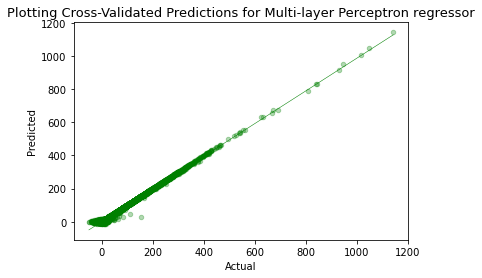

In [76]:
sns.regplot(x='Actual', y='Predicted',data=pred_mlp, color='g', scatter_kws={"s":20,'alpha':0.3}, line_kws={'linewidth':.5} )
plt.title("Plotting Cross-Validated Predictions for Multi-layer Perceptron regressor", loc='center',fontsize = 13)

Multi-layer Perceptron is the model with the best performance, both MSE (21,03) and R2 (0.993), followed by Linear Regression with MSE 35.744 and R2 98.9.

## Exercise 3 and 4


Train models using different parameters and compare their performance using train and test approach.

### Liniar regression

In [77]:
lm2 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,normalize='deprecated', positive=False)
model = lm2.fit(X_train, y_train)

In [78]:
y_pred_lin2 = lm2.predict(X_test)

In [79]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lin2).round(3))

MSE Linear Regression: 35.744


In [80]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lin2).round(3))

R2 Linear Regression: 0.989


MSE Linear Regression: 35.744, R2 Linear Regression: 0.989. After trying different parameters with Pycaret, we have not been able to improve the model.

### Decision Tree Regressor

In [81]:
tree2 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,random_state=123, splitter='best')

In [82]:
tree2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [83]:
y_pred_tree2 = tree2.predict(X_test)

In [84]:
print('MSE Decision Tree:',mean_squared_error(y_test, y_pred_tree2).round(3))

MSE Decision Tree: 89.014


In [85]:
print('R2 Decision Tree:',r2_score(y_test, y_pred_tree2).round(3))

R2 Decision Tree: 0.972


MSE Decision Tree: 91.975, R2 Decision Tree: 0.971. After trying different parameters with Pycaret, we have not been able to improve the model.

### Random Forest Regressor 

In [87]:
rf2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [88]:
rf2.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [89]:
y_pred_rf2 = rf2.predict(X_test)

In [90]:
print('MSE Random Forest:',mean_squared_error(y_test, y_pred_rf2).round(3))

MSE Random Forest: 47.676


In [91]:
print('R2 Random Forest:',r2_score(y_test, y_pred_rf2).round(3))

R2 Random Forest: 0.985


Defaul parameters:MSE Random Forest: 47.033, R2 Random Forest: 0.985. After trying different parameters with Pycaret, we have not been able to improve the model.

### Neural Networks. Multi-layer Perceptron regressor.

In [92]:
mlp2 = MLPRegressor(hidden_layer_sizes=(11,11,11), activation='relu', solver='adam', max_iter=1000)


In [93]:
mlp2.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(11, 11, 11), max_iter=1000)

In [94]:
y_pred_mlp2 = mlp2.predict(X_test)

In [95]:
print('MSE Multi-layer Perceptron:', mean_squared_error(y_test, y_pred_mlp2).round(3))

MSE Multi-layer Perceptron: 21.317


In [96]:
print('R2 Multi-layer Perceptron::', r2_score(y_test, y_pred_mlp2).round(3))

R2 Multi-layer Perceptron:: 0.993


Previous parameters: MSE Multi-layer Perceptron: 21.033, R2 Multi-layer Perceptron:: 0.993. For example, with activation logistic, the model doesn't improve. 

### Conclusion

After testing the performance of different regression models, Neural Networks with Multi-layer Perceptron regressor performs better in terms of Mean Square Error and Coefficient of Determination.

## Exercise 5

Engineer variables to improve prediction.

### Polynomintal Features

Generate polynomial and interaction features. Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

In [97]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from matplotlib import pyplot
import statistics

In [98]:
df3=features_df_new

In [99]:
df3.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'ActualElapsedTime', 'DepDelay',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'LateAircraftDelay'],
      dtype='object')

In [100]:
trans = PolynomialFeatures(degree=3)
df4 = trans.fit_transform(df3)


In [101]:
df5 = pd.DataFrame(df4)
# summarize
print(df5.shape)

(100000, 364)


Total number of columns after aplying model, 364.

In [103]:
df5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,"100,000.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
1,"100,000.00","1,518.66",448.16,1.00,"1,205.00","1,544.00","1,859.00","2,400.00"
2,"100,000.00","1,466.72",423.34,1.00,"1,135.00","1,509.00","1,815.00","2,359.00"
3,"100,000.00","1,610.49",546.25,1.00,"1,319.00","1,714.00","2,030.00","2,400.00"
4,"100,000.00",133.46,72.34,16.00,80.00,116.00,165.00,687.00
...,...,...,...,...,...,...,...,...
359,"100,000.00","3,052.77","89,193.84",0.00,0.00,0.00,0.00,"12,195,171.00"
360,"100,000.00","157,235.65","2,708,562.20",0.00,0.00,1.00,216.00,"452,984,832.00"
361,"100,000.00","8,166.86","137,564.79",0.00,0.00,9.00,9.00,"19,371,708.00"
362,"100,000.00","12,972.79","144,675.42",0.00,0.00,81.00,81.00,"14,780,556.00"


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df5, y, test_size=0.33, random_state=42)

In [105]:
lm3 = linear_model.LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=False)
model = lm3.fit(X_train, y_train)

In [106]:
y_pred_lm3 = lm3.predict(X_test)

In [107]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lm3).round(3))

MSE Linear Regression: 37.213


In [108]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lm3).round(3))

R2 Linear Regression: 0.988


In [109]:
y_pred_lm3

array([54.87475159, 17.12367444,  4.42491549, ...,  2.84174466,
        2.77811774, 75.64746022])

In [110]:
pred_lm3= pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lm3})
pred_lm3

,Actual,Predicted
1561935,57.00,54.87
141057,19.00,17.12
888391,0.00,4.42
708863,189.00,191.09
1430170,26.00,21.89
...,...,...
1583178,26.00,23.71
1426105,37.00,35.70
1836791,5.00,2.84
206452,-1.00,2.78


Previous scores: MSE Linear Regression: 35.744, R2 Linear Regression: 0.989. The results are similar.

### Standard Scaler

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
trans= StandardScaler()
data2= trans.fit_transform(features_df_new)
new_X=pd.DataFrame(data2)
new_X.columns=['DepTime', 'CRSDepTime', 'ArrTime', 'ActualElapsedTime', 'DepDelay',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'LateAircraftDelay']


In [115]:
new_X

,DepTime,CRSDepTime,ArrTime,ActualElapsedTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
0,0.30,0.34,0.43,-0.30,-0.00,-0.90,-0.78,-0.31,-0.14,-0.32,-0.30
1,-0.84,-0.80,-0.47,0.02,-0.62,-0.53,0.60,-0.31,-0.14,-0.32,-0.30
2,0.73,0.85,0.78,-0.35,-0.40,-0.53,-0.50,-0.36,-0.14,-0.36,0.07
3,0.52,0.61,0.75,0.23,-0.30,0.22,-0.57,-0.31,-0.14,-0.32,-0.30
4,0.85,0.41,0.91,-0.10,1.85,0.79,0.81,-0.36,-0.14,4.99,-0.56
...,...,...,...,...,...,...,...,...,...,...,...
99995,-3.29,-3.39,-1.59,1.45,-0.55,0.04,-0.16,-0.31,-0.14,-0.32,-0.30
99996,0.44,0.55,0.41,-0.74,-0.49,-0.90,-0.71,-0.31,-0.14,-0.32,-0.30
99997,-0.69,-1.03,-0.50,-0.61,1.09,0.04,-0.57,2.30,-0.14,-0.36,-0.56
99998,0.23,0.20,0.19,-0.24,-0.25,-0.15,-0.71,-0.31,-0.14,-0.32,-0.30


In [116]:
y_=y.array.reshape(-1, 1)

In [117]:
y_

<PandasArray>
[
[6.0],
[-12.0],
[22.0],
[12.0],
[150.0],
[140.0],
[82.0],
[-4.0],
[-4.0],
[13.0],
[34.0],
[81.0],
[238.0],
[5.0],
[24.0],
[8.0],
[9.0],
[173.0],
[24.0],
[-6.0],
[37.0],
[6.0],
[-8.0],
[3.0],
[67.0],
[12.0],
[11.0],
[72.0],
[-6.0],
[89.0],
[-1.0],
[28.0],
[30.0],
[20.0],
[12.0],
[-2.0],
[4.0],
[13.0],
[37.0],
[-16.0],
[2.0],
[18.0],
[6.0],
[15.0],
[9.0],
[18.0],
[4.0],
[16.0],
[61.0],
[6.0],
[33.0],
[5.0],
[36.0],
[94.0],
[35.0],
[19.0],
[107.0],
[125.0],
[28.0],
[8.0],
[107.0],
[23.0],
[41.0],
[3.0],
[10.0],
[45.0],
[441.0],
[0.0],
[115.0],
[2.0],
[100.0],
[24.0],
[-3.0],
[20.0],
[9.0],
[31.0],
[3.0],
[-6.0],
[3.0],
[38.0],
[36.0],
[30.0],
[73.0],
[170.0],
[51.0],
[52.0],
[1.0],
[114.0],
[22.0],
[99.0],
[-6.0],
[-3.0],
[4.0],
[31.0],
[60.0],
[42.0],
[48.0],
[0.0],
[6.0],
[5.0],
[-8.0],
[28.0],
[50.0],
[4.0],
[183.0],
[51.0],
[94.0],
[82.0],
[7.0],
[-1.0],
[16.0],
[46.0],
[103.0],
[64.0],
[2.0],
[7.0],
[2.0],
[23.0],
[20.0],
[8.0],
[19.0],
[1.0],
[35.0],
[19.0],
[185.0],

In [118]:
trans= StandardScaler()
data3= trans.fit_transform(y_)
new_y=pd.DataFrame(data3)
new_y.columns=['ArrDelay']



In [119]:
new_y

,ArrDelay
0,-0.64
1,-0.96
2,-0.36
3,-0.53
4,1.91
...,...
99995,-0.78
99996,-0.53
99997,0.94
99998,-0.32


In [120]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.33, random_state=42)

In [121]:
lm4 = linear_model.LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=False)
model = lm4.fit(X_train, y_train)

In [122]:
y_pred_lm4 = lm4.predict(X_test)

In [123]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lm4).round(3))

MSE Linear Regression: 0.011


In [124]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lm4).round(3))

R2 Linear Regression: 0.989


After scaling we have improved MSE, which is nou 0.011, being R2 the same.

## Exercise 6

Do not use DepDelay in the prediction model. 

In [125]:
new_X_=new_X.drop(labels='DepDelay', axis=1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(new_X_, new_y, test_size=0.33, random_state=42)

In [127]:
lm5 = linear_model.LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=False)
model = lm5.fit(X_train, y_train)

In [128]:
y_pred_lm5= lm5.predict(X_test)

In [129]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lm5).round(3))

MSE Linear Regression: 0.012


In [130]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lm5).round(3))

R2 Linear Regression: 0.988


Without DepDelay the result is the same.

Lat's try now dropping different causes of delay, which added they sum up ArrDelay.

In [131]:
new_X_2=new_X_.drop(labels=['CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay'], axis=1)

In [132]:
new_X_2

,DepTime,CRSDepTime,ArrTime,ActualElapsedTime,TaxiIn,TaxiOut
0,0.30,0.34,0.43,-0.30,-0.90,-0.78
1,-0.84,-0.80,-0.47,0.02,-0.53,0.60
2,0.73,0.85,0.78,-0.35,-0.53,-0.50
3,0.52,0.61,0.75,0.23,0.22,-0.57
4,0.85,0.41,0.91,-0.10,0.79,0.81
...,...,...,...,...,...,...
99995,-3.29,-3.39,-1.59,1.45,0.04,-0.16
99996,0.44,0.55,0.41,-0.74,-0.90,-0.71
99997,-0.69,-1.03,-0.50,-0.61,0.04,-0.57
99998,0.23,0.20,0.19,-0.24,-0.15,-0.71


In [133]:
X_train, X_test, y_train, y_test = train_test_split(new_X_2, new_y, test_size=0.33, random_state=42)

In [134]:
lm6 = linear_model.LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive=False)
model = lm6.fit(X_train, y_train)

In [135]:
y_pred_lm6= lm6.predict(X_test)

In [136]:
print('MSE Linear Regression:', mean_squared_error(y_test, y_pred_lm6).round(3))

MSE Linear Regression: 0.85


In [137]:
print('R2 Linear Regression:',r2_score(y_test, y_pred_lm6).round(3))

R2 Linear Regression: 0.151


The result is not good since R2 is only 0.15.